**5. Inflammation**
---



In [1]:
### Basic Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.io import loadmat

### Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


#### Datasets, Metrics and Preprocessing

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.utils.multiclass import unique_labels

In [2]:
# import classiy function from the 'main_functions' notebook
from ipynb.fs.defs.main_functions import classify, plot_confusion, del_nan

In [3]:
# Defining the classifier that can be used with easy calling names
classifiers = {'Naive Bayes': GaussianNB, 'KNN': KNeighborsClassifier, 'Logistic Regression': LogisticRegression,\
              'RF': RandomForestClassifier, 'SVM': SVC, 'SGD': SGDClassifier, 'AdaBoost': AdaBoostClassifier}

In [4]:
# Reading the dataset and creating the dataframe
sonar = loadmat('Datasets.mat/Acute_Inflammations_binary_classification120x6.mat')

df = pd.DataFrame(sonar.get('X'))
df['y'] = sonar.get('y1').ravel()

In [5]:
df

,0,1,2,3,4,5,y
0,35.5,0.0,1.0,0.0,0.0,0.0,0
1,35.9,0.0,0.0,1.0,1.0,1.0,1
2,35.9,0.0,1.0,0.0,0.0,0.0,0
3,36.0,0.0,0.0,1.0,1.0,1.0,1
4,36.0,0.0,1.0,0.0,0.0,0.0,0
5,36.0,0.0,1.0,0.0,0.0,0.0,0
6,36.2,0.0,0.0,1.0,1.0,1.0,1
7,36.2,0.0,1.0,0.0,0.0,0.0,0
8,36.3,0.0,0.0,1.0,1.0,1.0,1
9,36.6,0.0,0.0,1.0,1.0,1.0,1


In [6]:
df, df_test = train_test_split(df, test_size=0.2, stratify=df['y'])

In [7]:
len(df)+len(df_test)

120

# Exploratory Data Analysis (EDA)
This step is to get to know the data and decide what type of preprocessing needs to be done before training the model

In [8]:
df.head()

,0,1,2,3,4,5,y
26,37.0,0.0,0.0,1.0,1.0,1.0,1
118,41.5,0.0,1.0,1.0,0.0,1.0,0
78,40.1,1.0,1.0,1.0,1.0,0.0,1
99,40.9,1.0,1.0,1.0,1.0,0.0,1
40,37.5,0.0,1.0,0.0,0.0,0.0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 26 to 9
Data columns (total 7 columns):
0    96 non-null float64
1    96 non-null float64
2    96 non-null float64
3    96 non-null float64
4    96 non-null float64
5    96 non-null float64
y    96 non-null uint8
dtypes: float64(6), uint8(1)
memory usage: 5.3 KB


In [10]:
df.describe()

,0,1,2,3,4,5,y
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,38.714583,0.270833,0.625000,0.645833,0.489583,0.385417,0.489583
std,1.840765,0.446723,0.486664,0.480771,0.502516,0.489248,0.502516
min,35.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.950000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,40.525000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,41.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


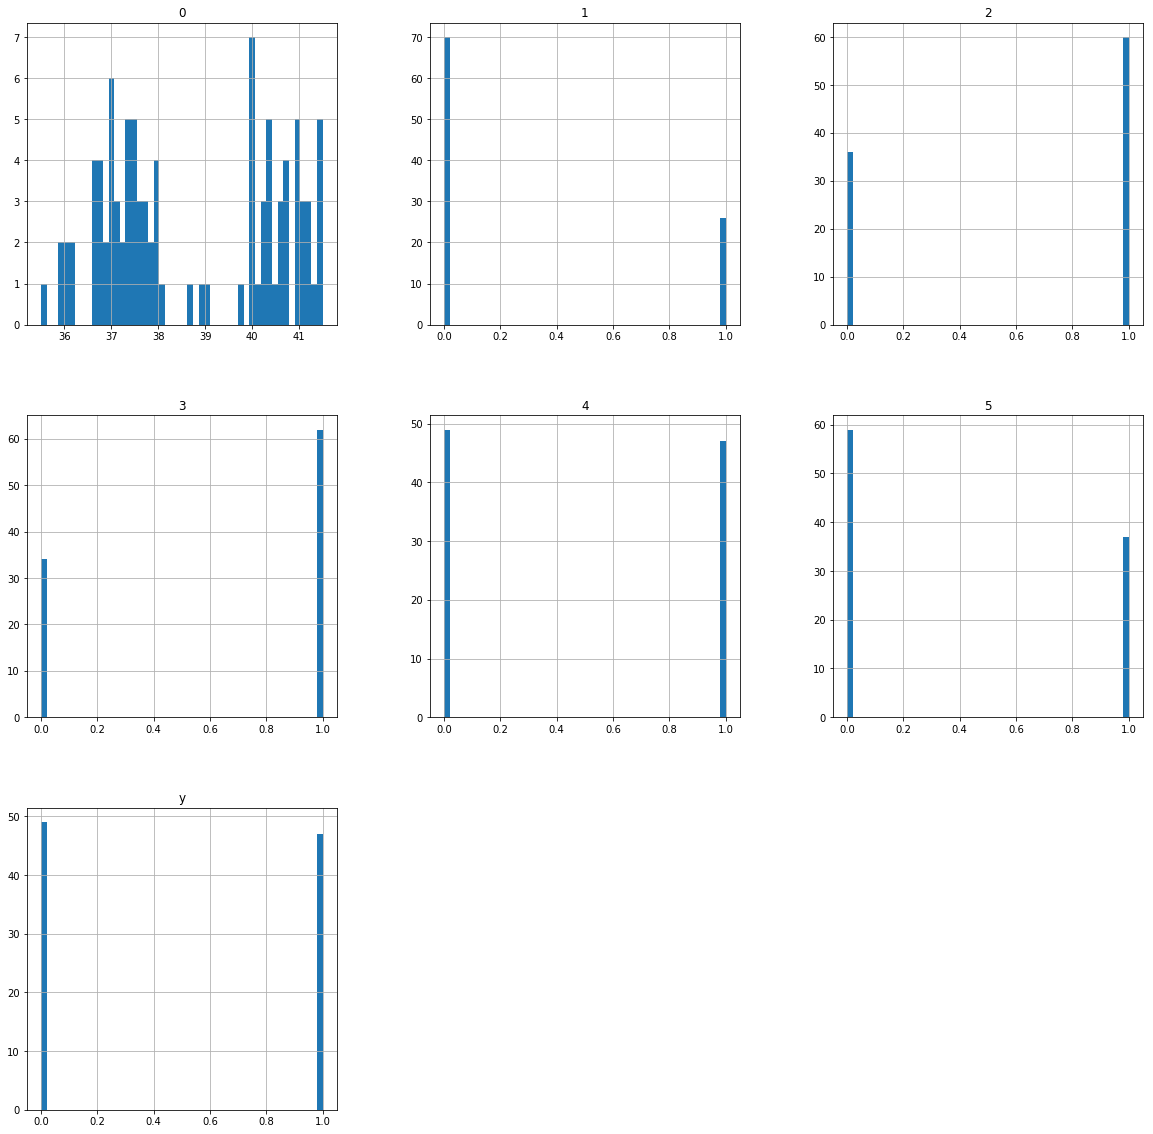

In [11]:
df.hist(bins= 50, figsize=(20,20))
plt.show()

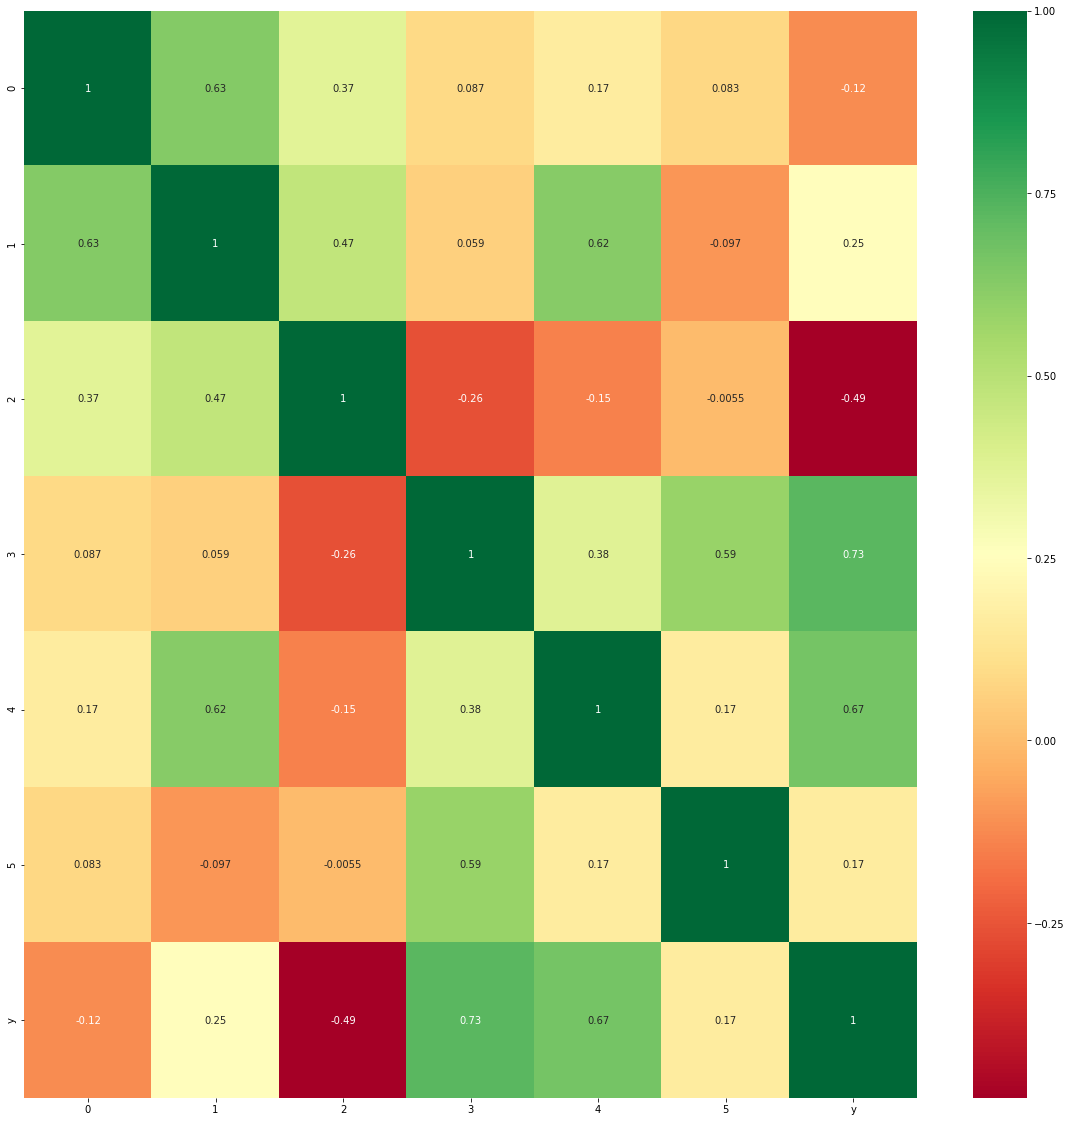

In [12]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
# top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [13]:
corrmat['y'].sort_values(ascending=True)

2   -0.489608
0   -0.121596
5    0.166355
1    0.247154
4    0.666522
3    0.725261
y    1.000000
Name: y, dtype: float64

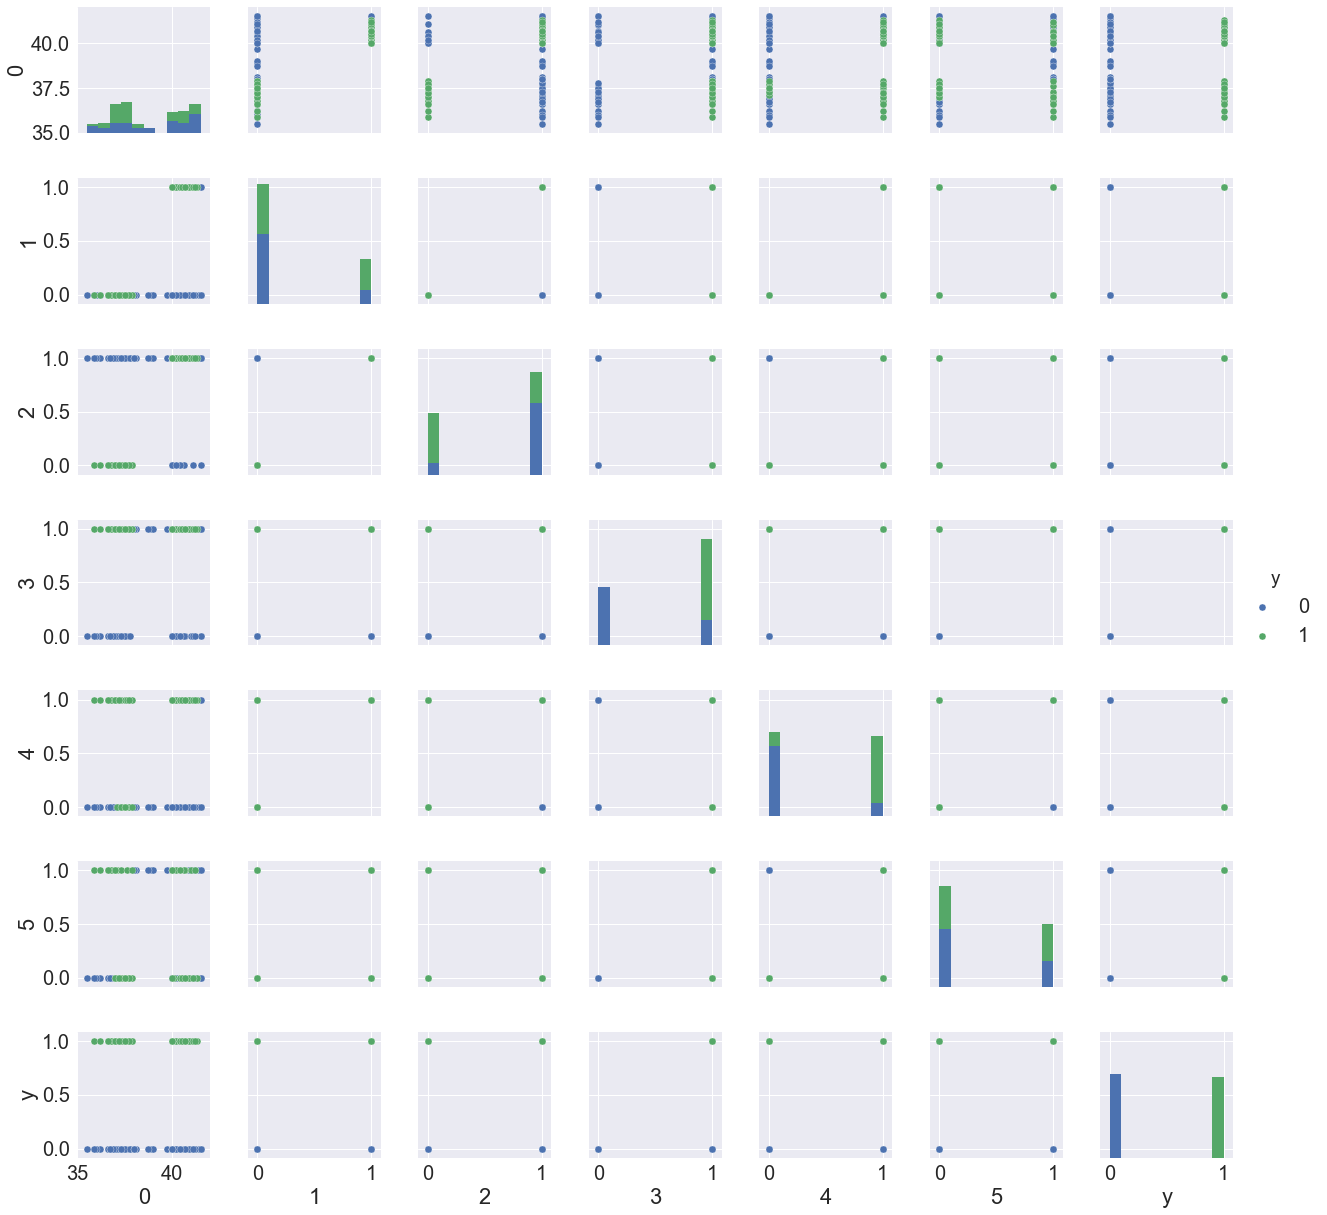

In [14]:
import seaborn as sns
sns.set(font_scale=2)
sns.pairplot(df, hue='y')

In [15]:
df['y'].value_counts()
df['y'].value_counts()/df['y'].value_counts().sum()
# print(ratio)

0    0.510417
1    0.489583
Name: y, dtype: float64

# Preprocessing

**In this dataset:** <br>
- No categorical attributes exists <br>
- I did not consider it as imbalanced since the ratio is almost 2:3
- Scaling will be applied

In [16]:
scaler = MinMaxScaler()
df_features = df.drop('y',axis=1)
cancer_prepared = scaler.fit_transform(df_features)

# 1. Naive Bayes

In [17]:
sns.set(font_scale=1)
sns.set_style('ticks')

The model score is 0.839 (+/- 0.112)
The IQR is 0.150 between [0.75,0.90]
There is 0 deleted rows
              precision    recall  f1-score   support

         0.0       1.00      0.69      0.82       490
         1.0       0.76      1.00      0.86       470

    accuracy                           0.84       960
   macro avg       0.88      0.85      0.84       960
weighted avg       0.88      0.84      0.84       960

The average training time is 0.001863 seconds


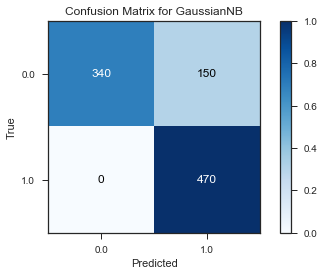

In [18]:
val_conf_NB, val_scores_NB, val_time_NB = classify(df.drop('y',axis=1), np.array(df['y']), classifiers['Naive Bayes']())
print('The average training time is %0.6f seconds'%val_time_NB.mean())

The test accuracy is 0.75
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         6
           1       1.00      0.67      0.80        18

    accuracy                           0.75        24
   macro avg       0.75      0.83      0.73        24
weighted avg       0.88      0.75      0.77        24



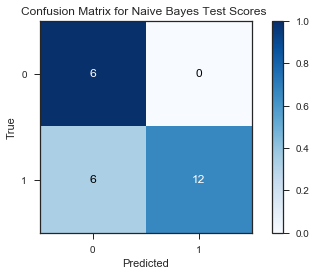

In [19]:
#  Fitting on the training data
NB = classifiers['Naive Bayes']()
NB.fit(df.drop('y',axis=1), df['y'])

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = NB.predict(df_test.drop('y',axis=1))
test_score_NB = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_NB)
print(classification_report(test_pred, df_test['y']))
_,test_conf_NB = plot_confusion(test_pred, df_test['y'],'Naive Bayes Test Scores ()')

# 2. Logistic Regression

The model score is 1.000 (+/- 0.000)
The IQR is 0.000 between [1.00,1.00]
There is 0 deleted rows
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       490
         1.0       1.00      1.00      1.00       470

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960

The average training time is 0.001718 seconds


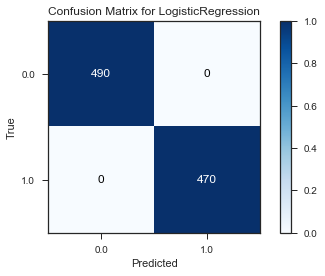

In [20]:
val_conf_LR, val_scores_LR, val_time_LR = classify(cancer_prepared, np.array(df['y']),
                                              classifiers['Logistic Regression'](solver='liblinear'))
print('The average training time is %0.6f seconds'%val_time_LR.mean())

In [21]:
scaled_test = scaler.transform(df_test.drop('y',axis=1))

The test accuracy is 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



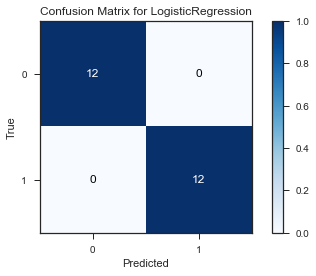

In [22]:
#  Fitting on the training data
LR = classifiers['Logistic Regression'](solver='liblinear')
LR.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = LR.predict(scaled_test)
test_score_LR = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_LR)
print(classification_report(test_pred, df_test['y']))
_,test_conf_LR = plot_confusion(test_pred, df_test['y'],LR)

# 3. Ensemble - Random Forests

n_estimators=500

The model score is 1.000 (+/- 0.000)
The IQR is 0.000 between [1.00,1.00]
There is 0 deleted rows
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       490
         1.0       1.00      1.00      1.00       470

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960

The average training time is 0.448419 seconds


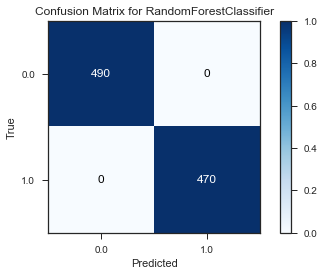

In [23]:
val_conf_RF, val_scores_RF, val_time_RF = classify(df.drop('y',axis=1), df['y'],
                                                   classifiers['RF'](n_estimators = 500,n_jobs=-1))
print('The average training time is %0.6f seconds'%val_time_RF.mean())

The test accuracy is 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



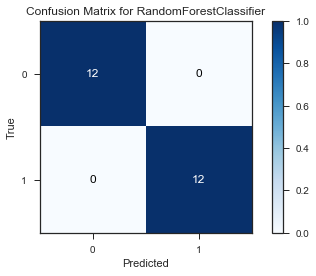

In [24]:
#  Fitting on the training data
RF = classifiers['RF'](n_estimators = 500, n_jobs=-1)
RF.fit(df.drop('y',axis=1), df['y'])

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = RF.predict(df_test.drop('y',axis=1))
test_score_RF = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_RF)
print(classification_report(test_pred, df_test['y']))
_,test_conf_RF = plot_confusion(test_pred, df_test['y'],RF)

# 4. Ensemble - AdaBoost

The model score is 0.988 (+/- 0.045)
The IQR is 0.000 between [1.00,1.00]
There is 0 deleted rows
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       490
         1.0       0.98      1.00      0.99       470

    accuracy                           0.99       960
   macro avg       0.99      0.99      0.99       960
weighted avg       0.99      0.99      0.99       960

The average training time is 0.193174 seconds


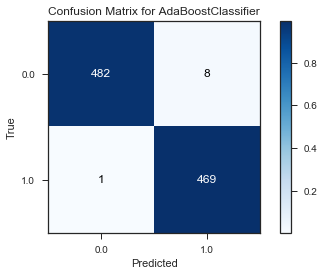

In [25]:
val_conf_Ada, val_scores_Ada, val_time_Ada = classify(df.drop('y',axis=1), df['y'],
                                                      classifiers['AdaBoost'](n_estimators=200))
print('The average training time is %0.6f seconds'%val_time_Ada.mean())

The test accuracy is 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



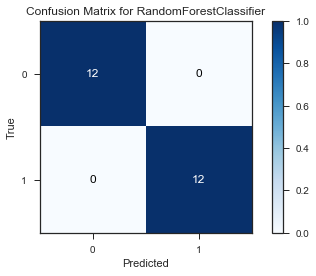

In [26]:
#  Fitting on the training data
Ada = classifiers['AdaBoost'](n_estimators = 200)
Ada.fit(df.drop('y',axis=1), df['y'])

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = Ada.predict(df_test.drop('y',axis=1))
test_score_Ada = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_Ada)
print(classification_report(test_pred, df_test['y']))
_,test_conf_Ada = plot_confusion(test_pred, df_test['y'],RF)

# 5. K-Nearest Neighbours

In [27]:
np.shape(df['y'])

(96,)

The model score is 1.000 (+/- 0.000)
The IQR is 0.000 between [1.00,1.00]
There is 0 deleted rows
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       490
         1.0       1.00      1.00      1.00       470

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960

The model score is 1.000 (+/- 0.000)
The IQR is 0.000 between [1.00,1.00]
There is 0 deleted rows
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       490
         1.0       1.00      1.00      1.00       470

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960

The model score is 1.000 (+/- 0.000)
The IQR is 0.000 between [1.00,1.00]
There is 0 deleted rows
              precision    recall  f1-score   suppor

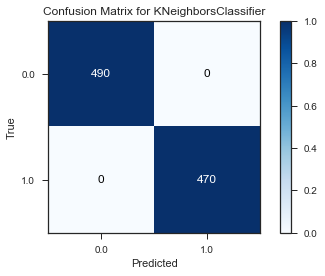

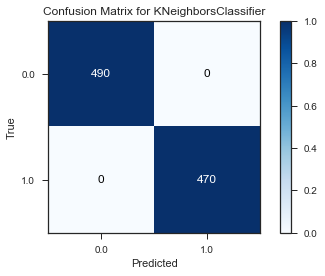

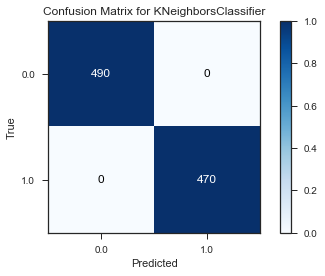

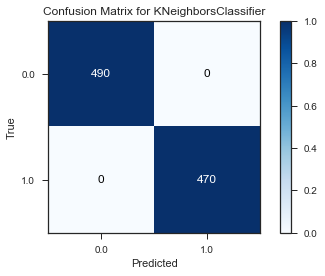

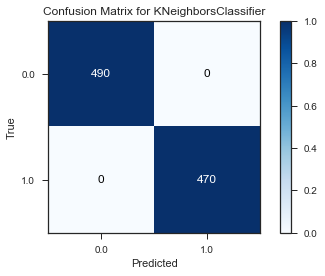

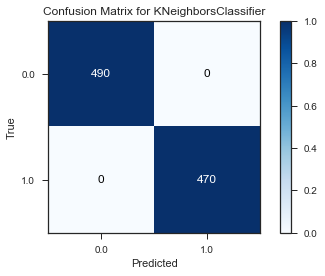

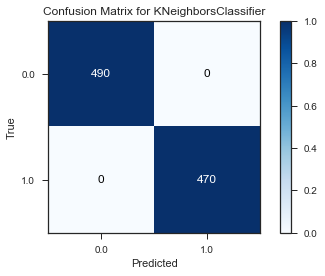

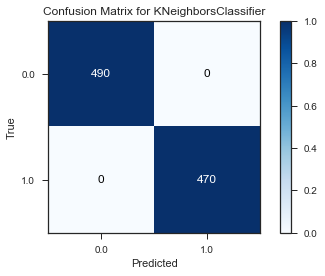

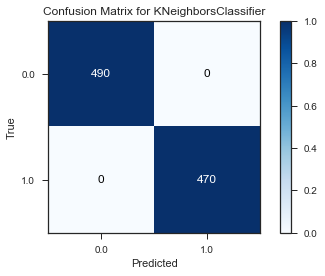

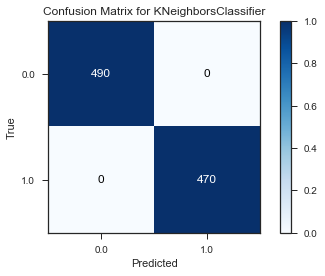

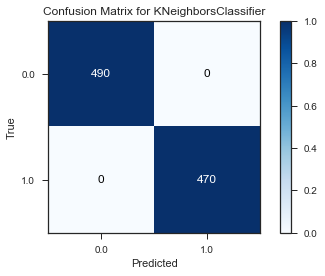

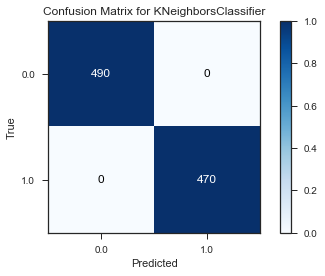

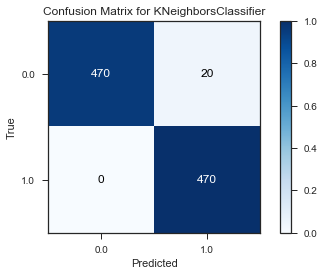

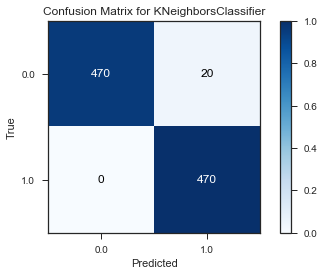

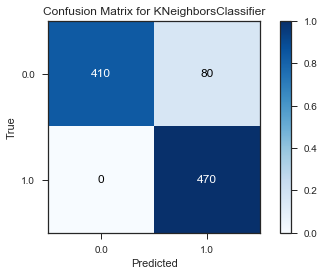

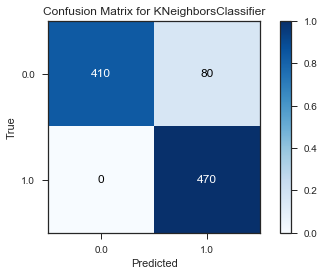

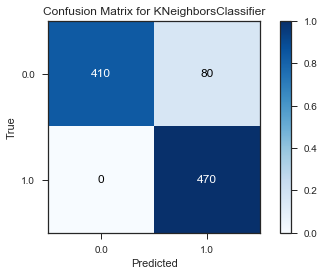

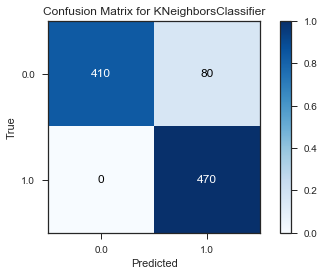

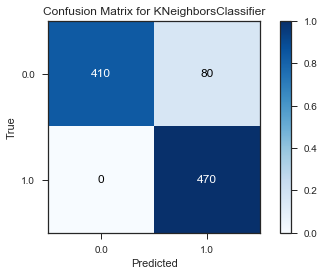

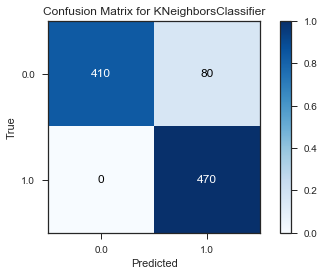

In [28]:
KNN_scores = []
for k in range(1,21):
    _, val_scores_KNN, _= classify(cancer_prepared, np.array(df['y']),classifiers['KNN'](k))
    KNN_scores.append(np.round(val_scores_KNN.mean(),4))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

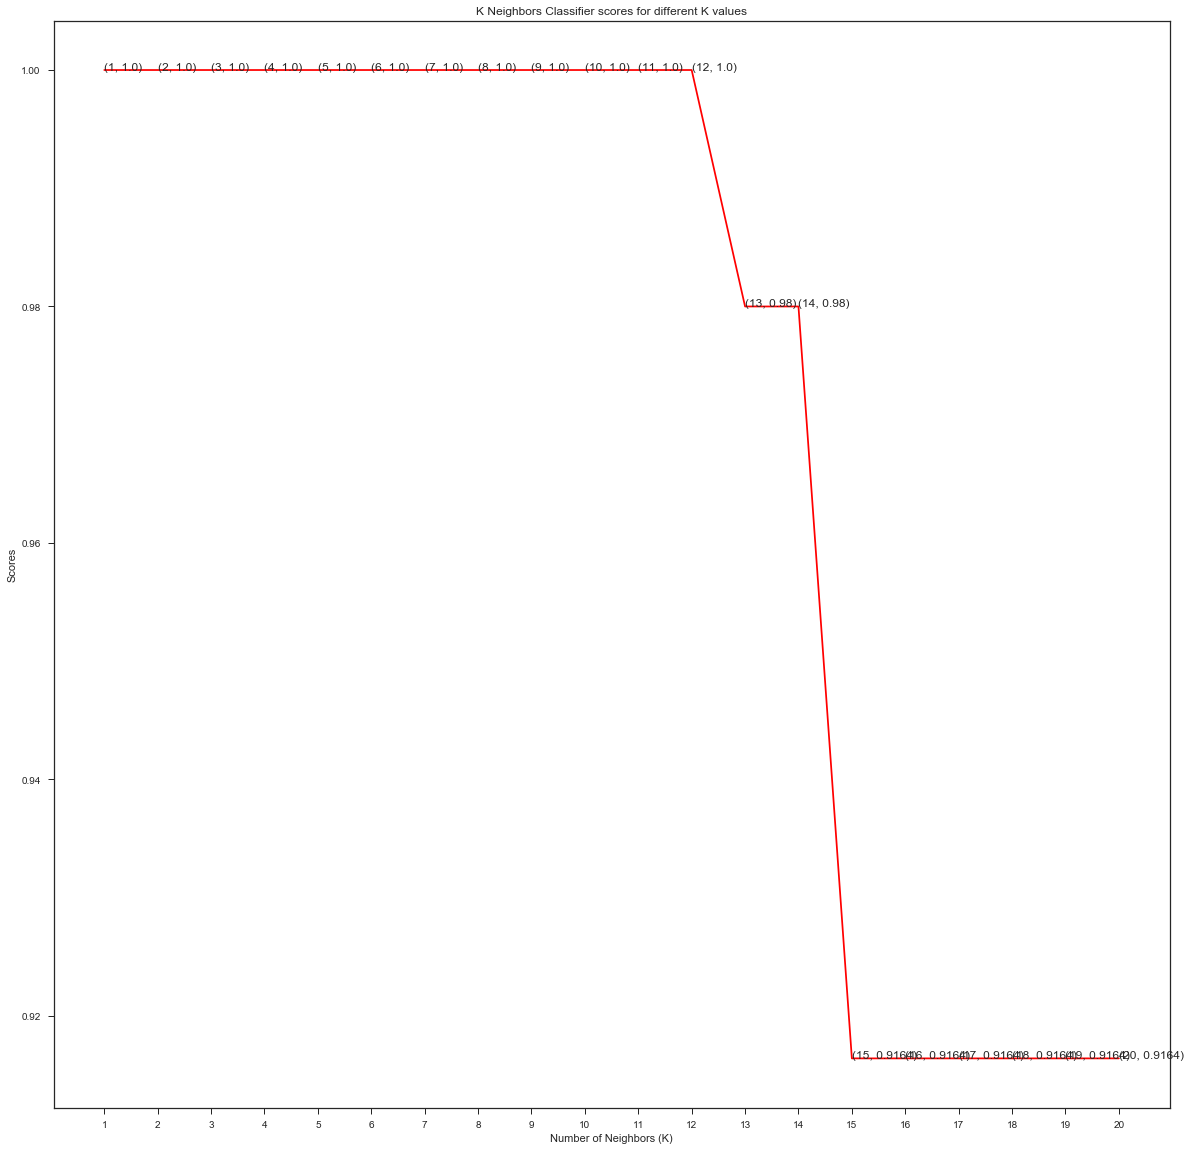

In [29]:
plt.figure(figsize=(20,20))
plt.plot([k for k in range(1, 21)], KNN_scores, color = 'red')
for i in range(1,21):
    plt.text(i, KNN_scores[i-1], (i, KNN_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

The model score is 1.000 (+/- 0.000)
The IQR is 0.000 between [1.00,1.00]
There is 0 deleted rows
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       490
         1.0       1.00      1.00      1.00       470

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960

The average training time is 0.001711 seconds


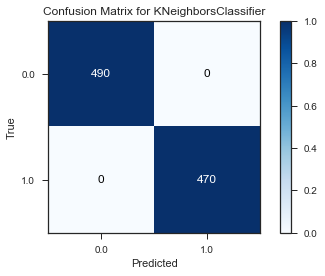

In [30]:
val_conf_KNN, val_scores_KNN, val_time_KNN = classify(cancer_prepared, np.array(df['y']),
                                                      classifiers['KNN'](KNN_scores.index(max(KNN_scores))+1))
print('The average training time is %0.6f seconds'%val_time_KNN.mean())

The test accuracy is 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



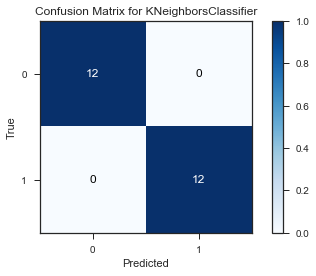

In [31]:
#  Fitting on the training data
KNN = classifiers['KNN'](KNN_scores.index(max(KNN_scores))+1)
KNN.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = KNN.predict(scaled_test)
test_score_KNN = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.4f'%test_score_KNN)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_KNN = plot_confusion(test_pred, df_test['y'],KNN)

# 6. Support Vector Machines - Linear Kernel

In [32]:
from time import time

In [33]:
param_grid = [
    {'C':2.**np.linspace(-5,15,21),'gamma':2.**np.linspace(-15,3,19)}
]

clf = SVC(kernel='linear')
start = time()
grid_search_L = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)
grid_search_L.fit(cancer_prepared, np.array(df['y']))
print('Time take to search for the best combination si %0.6f seconds'% (time()-start))

Time take to search for the best combination si 2.553072 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The model score is 1.000 (+/- 0.000)
The IQR is 0.000 between [1.00,1.00]
There is 0 deleted rows
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       490
         1.0       1.00      1.00      1.00       470

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960

The average training time is 0.001964 seconds


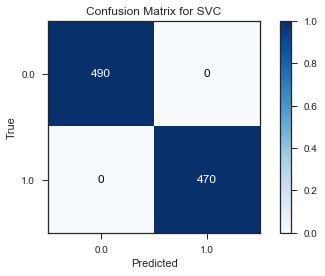

In [34]:
val_conf_SVM_L_opt, val_scores_SVM_L_opt, val_time_SVM_L = classify(cancer_prepared, np.array(df['y']),
                                                 classifiers['SVM'](kernel='linear', C=grid_search_L.best_params_['C'],
                                                                        gamma = grid_search_L.best_params_['gamma']))

print('The average training time is %0.6f seconds'%val_time_SVM_L.mean())

In [35]:
cvres = grid_search_L.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.9583333333333334 {'C': 0.03125, 'gamma': 3.0517578125e-05}
0.9583333333333334 {'C': 0.03125, 'gamma': 6.103515625e-05}
0.9583333333333334 {'C': 0.03125, 'gamma': 0.0001220703125}
0.9583333333333334 {'C': 0.03125, 'gamma': 0.000244140625}
0.9583333333333334 {'C': 0.03125, 'gamma': 0.00048828125}
0.9583333333333334 {'C': 0.03125, 'gamma': 0.0009765625}
0.9583333333333334 {'C': 0.03125, 'gamma': 0.001953125}
0.9583333333333334 {'C': 0.03125, 'gamma': 0.00390625}
0.9583333333333334 {'C': 0.03125, 'gamma': 0.0078125}
0.9583333333333334 {'C': 0.03125, 'gamma': 0.015625}
0.9583333333333334 {'C': 0.03125, 'gamma': 0.03125}
0.9583333333333334 {'C': 0.03125, 'gamma': 0.0625}
0.9583333333333334 {'C': 0.03125, 'gamma': 0.125}
0.9583333333333334 {'C': 0.03125, 'gamma': 0.25}
0.9583333333333334 {'C': 0.03125, 'gamma': 0.5}
0.9583333333333334 {'C': 0.03125, 'gamma': 1.0}
0.9583333333333334 {'C': 0.03125, 'gamma': 2.0}
0.9583333333333334 {'C': 0.03125, 'gamma': 4.0}
0.9583333333333334 {'C': 0.03125,

The test accuracy is 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



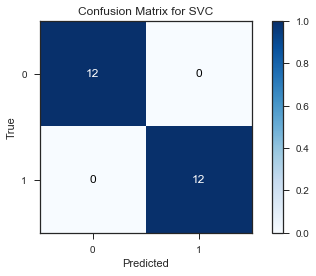

In [36]:
#  Fitting on the training data
SVM_L = classifiers['SVM'](kernel='linear', 
                           C=grid_search_L.best_params_['C'], 
                          gamma = grid_search_L.best_params_['gamma'])
SVM_L.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = SVM_L.predict(scaled_test)
test_score_SVM_L = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.4f'%test_score_SVM_L)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_SVM_L = plot_confusion(test_pred, df_test['y'],SVM_L)

# 7. Support Vector Machines - RBF Kernel

In [37]:
param_grid = [
    {'C':2.**np.linspace(-5,15,21),'gamma':2.**np.linspace(-15,3,19)}
]

clf = SVC(kernel='rbf')

start = time()
grid_search_RBF = GridSearchCV(clf, param_grid, cv=10,n_jobs=-1)
grid_search_RBF.fit(cancer_prepared, np.array(df['y']))
print('Time take to search for the best combination si %0.6f seconds'% (time()-start))

Time take to search for the best combination si 2.670268 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The model score is 1.000 (+/- 0.000)
The IQR is 0.000 between [1.00,1.00]
There is 0 deleted rows
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       490
         1.0       1.00      1.00      1.00       470

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960

The average training time is 0.001836 seconds


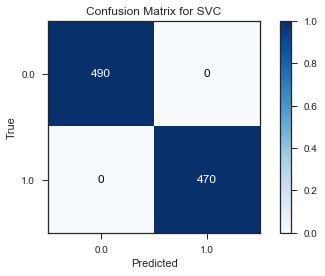

In [38]:
val_conf_SVM_RBF, val_scores_SVM_RBF, val_time_SVM_RBF = classify(cancer_prepared, np.array(df['y']),
                                                             classifiers['SVM'](kernel='rbf', 
                                                                                C=grid_search_RBF.best_params_['C'],
                                                                        gamma = grid_search_RBF.best_params_['gamma']))

print('The average training time is %0.6f seconds'%val_time_SVM_RBF.mean())

The test accuracy is 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



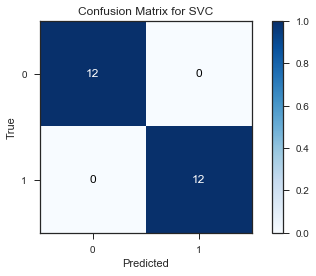

In [39]:
#  Fitting on the training data
SVM_RBF = classifiers['SVM'](kernel='rbf', 
                           C=grid_search_RBF.best_params_['C'], 
                          gamma = grid_search_RBF.best_params_['gamma'])
SVM_RBF.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = SVM_RBF.predict(scaled_test)
test_score_SVM_RBF = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.4f'%test_score_SVM_RBF)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_SVM_L = plot_confusion(test_pred, df_test['y'],SVM_RBF)

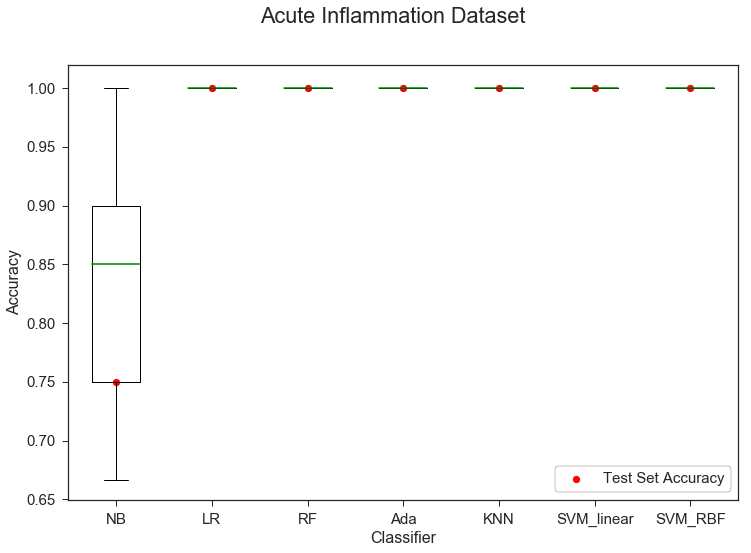

In [45]:
sns.set(font_scale=1.5)
sns.set_style('ticks')
median_prop = dict(color='g', linewidth = 1.5)
fig = plt.figure(figsize=(12,8))
fig.suptitle('Acute Inflammation Dataset')
ax = fig.add_subplot(111)
method_labels = ['NB','LR','RF','Ada','KNN','SVM_linear','SVM_RBF']
test_results = [test_score_NB, test_score_LR, test_score_RF, test_score_Ada, 
                test_score_KNN, test_score_SVM_L, test_score_SVM_RBF]
plt.boxplot([val_scores_NB, val_scores_LR, val_scores_RF, val_scores_Ada, 
             val_scores_KNN, val_scores_SVM_L_opt, val_scores_SVM_RBF], medianprops = median_prop)
ax.set_xticklabels(method_labels)
plt.scatter(x=range(1,8), y=test_results, color='r', label='Test Set Accuracy')
ax.legend(frameon=True, edgecolor='black')
# ax.set_ylim([0.69,1.01])
ax.set_ylabel('Accuracy', fontsize = 16)
ax.set_xlabel('Classifier', fontsize = 16)
plt.show()


In [41]:
test_results

[0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [42]:
val_results = [val_scores_NB.mean(), val_scores_LR.mean(), val_scores_RF.mean(), val_scores_Ada.mean(), 
             val_scores_KNN.mean(), val_scores_SVM_L_opt.mean(), val_scores_SVM_RBF.mean()]
pd.DataFrame(val_results)

,0
0,0.839444
1,1.000000
2,1.000000
3,0.988000
4,1.000000
5,1.000000
6,1.000000


In [44]:
val_inflam=[val_scores_NB, val_scores_LR, val_scores_RF, val_scores_Ada, 
             val_scores_KNN, val_scores_SVM_L_opt, val_scores_SVM_RBF]
%store val_inflam

Stored 'val_inflam' (list)
